In [1]:
import os 
os.chdir(r'Q:\sachuriga\Sachuriga_Python/quattrocolo-nwb4fp\src')

from neurochat.nc_data import NData
from neurochat.nc_spike import NSpike
from neurochat.nc_spatial import NSpatial
import neurochat.nc_plot as nc_plot
from neurochat.nc_lfp import NLfp
import matplotlib.pyplot as plt
import numpy as np
from pynwb import NWBHDF5IO
import matplotlib.pyplot as plt
import numpy as np
import math
import pynapple as nap
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize

import sys
import nwb4fp.analyses.maps as mapp
from nwb4fp.analyses.examples.tracking_plot import plot_ratemap,plot_path
from nwb4fp.analyses.fields import separate_fields_by_laplace, separate_fields_by_dilation,find_peaks,separate_fields_by_laplace_of_gaussian,calculate_field_centers,distance_to_edge_function, remove_fields_by_area, map_pass_to_unit_circle,which_field,compute_crossings
from elephant.statistics import time_histogram, instantaneous_rate
from nwb4fp.analyses import maps
from nwb4fp.analyses.data import pos2speed,speed_filtered_spikes,load_speed_fromNWB,load_units_fromNWB,get_filed_num,unit_location_ch
from scipy.ndimage import gaussian_filter
import ast
import pandas as pd
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=np.inf)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import seaborn as sns
from itertools import chain
import pandas as pd
from nwb4fp.data.helpers import df2results, df2results_sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import seaborn as sns


Q:\sachuriga\Sachuriga_Python\quattrocolo-nwb4fp\src\nwb4fp\analyses\examples\tracking_plot.py:5: DeprecationWarning: Please import `center_of_mass` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.measurements import center_of_mass


C:\Users\sachur\AppData\Local\Temp\ipykernel_16864\1862769790.py:223: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_16864\1862769790.py:256: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(['CR;DTA-', 'CR;DTA+'],rotation=-25)
C:\Users\sachur\AppData\Local\Temp\ipykernel_16864\1862769790.py:223: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_16864\1862769790.py:256: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using

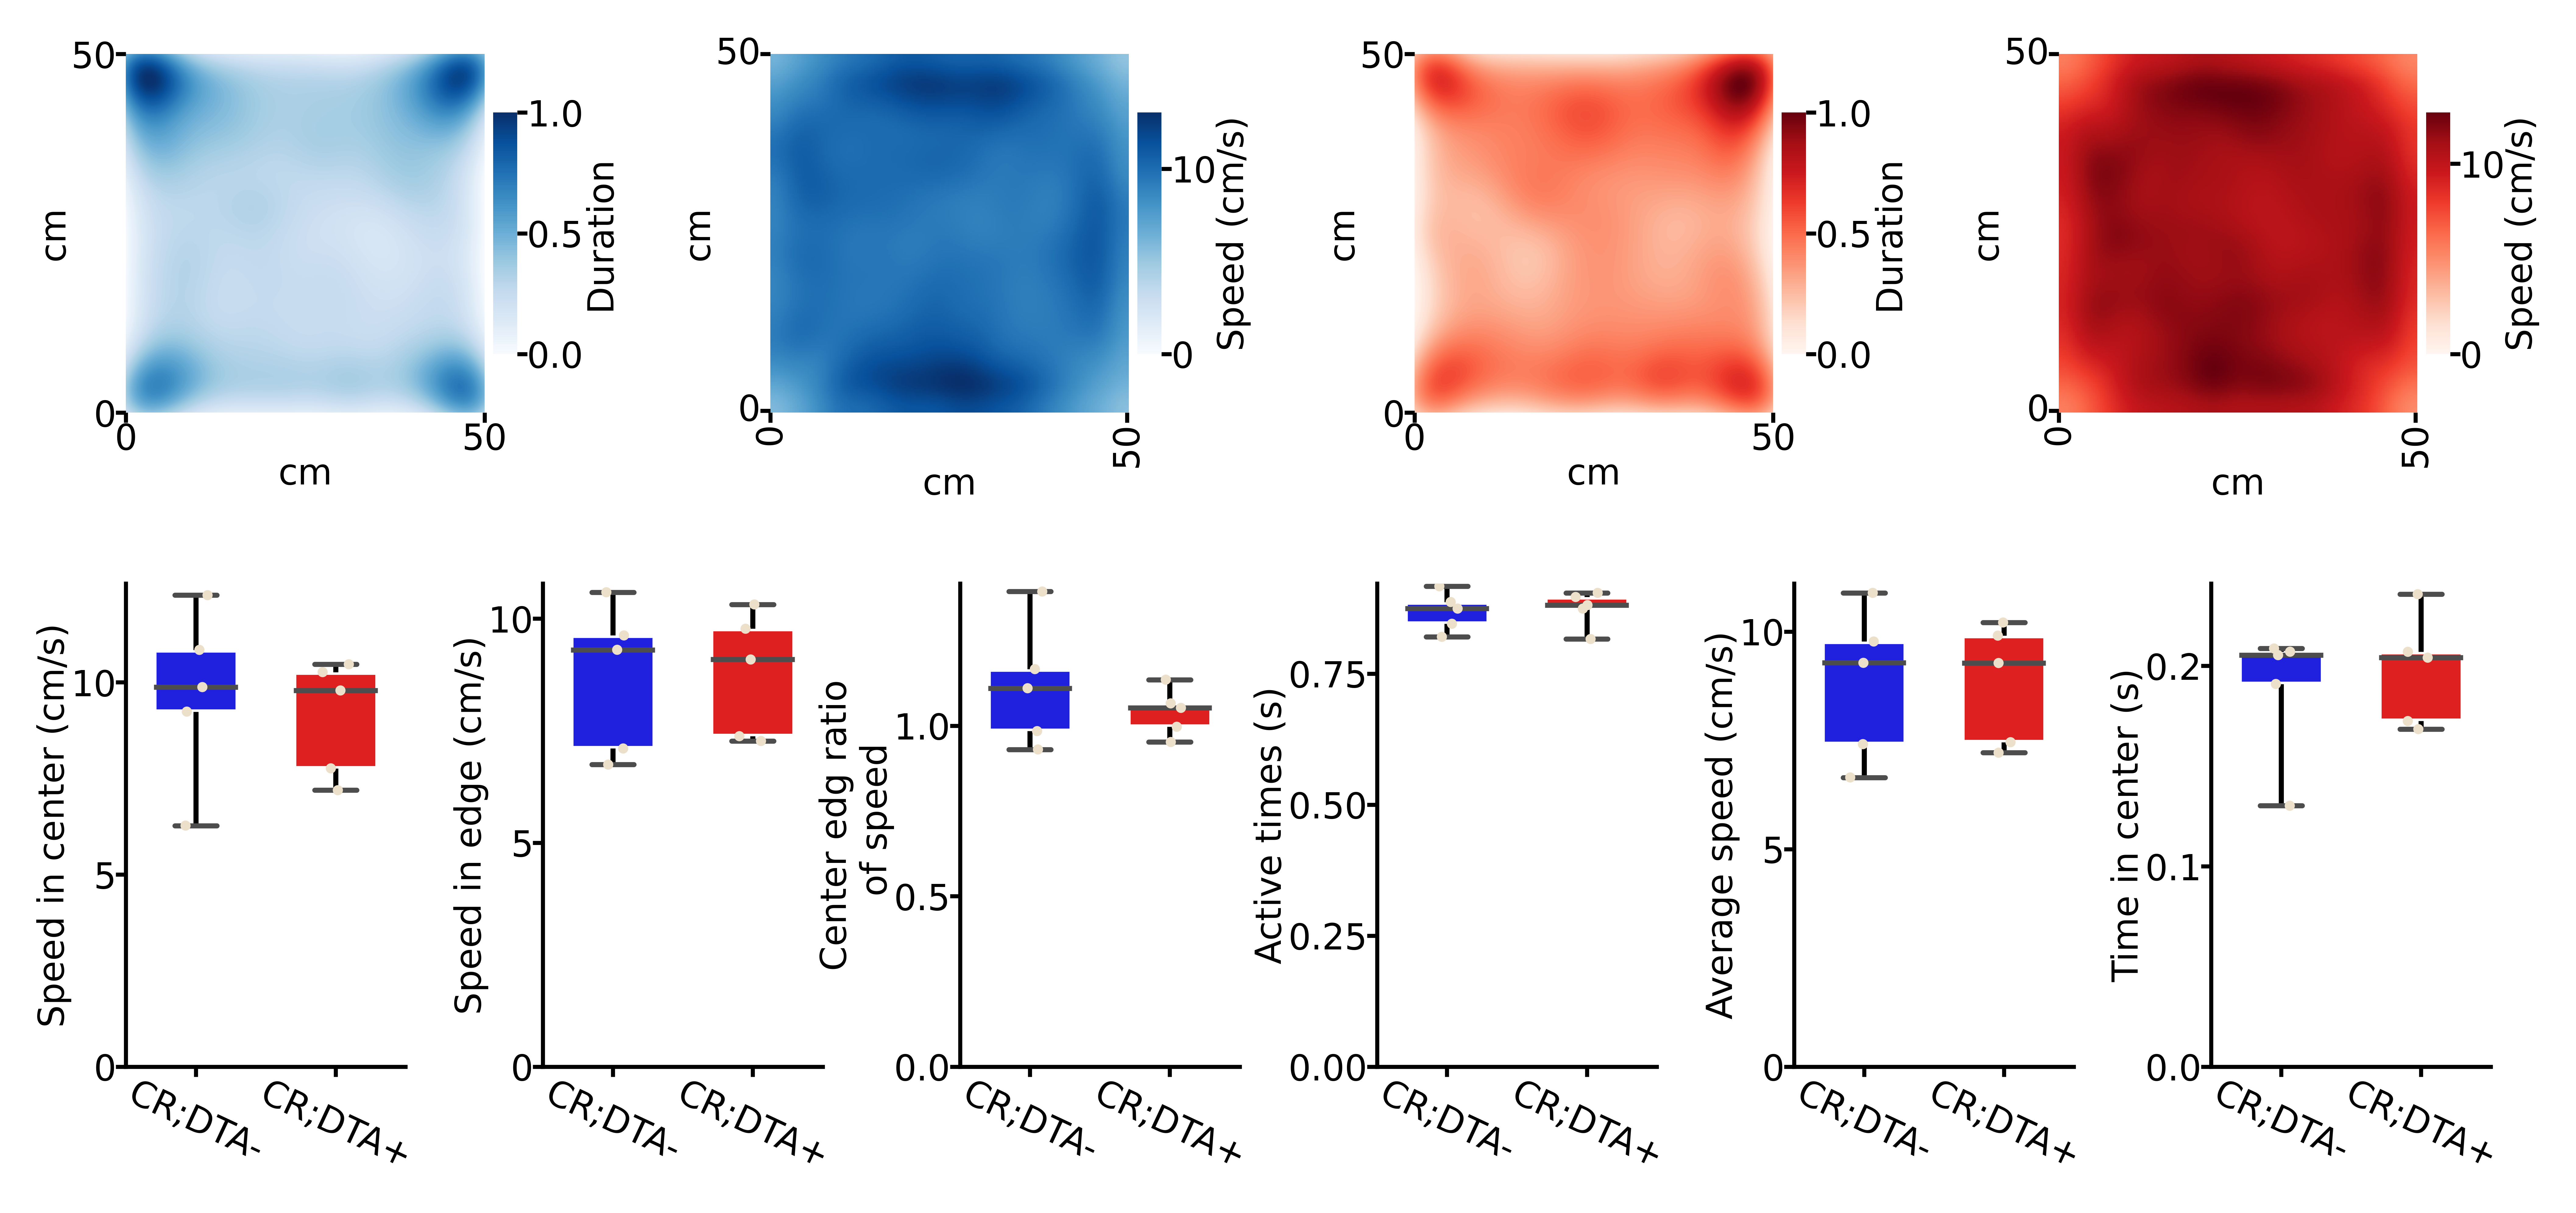

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from scipy.stats import gaussian_kde
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure
fig = plt.figure(figsize=(7.2, 3.6), dpi=1200)

# Define GridSpec: 3 rows, 4 columns (since you want 4 even plots in the first two rows)
gs = gridspec.GridSpec(2, 4, height_ratios=[1, 1])  # 3 rows, 4 columns
plt.rcParams.update({'font.size': 7,'font.family': 'DejaVu Sans'})
plt.rcParams.update({
    'axes.labelpad': -0.1,
    'ytick.major.pad': -0.1,
    'xtick.major.pad': -0.1,
    'ytick.major.size': 2,
    'xtick.major.size': 2
})

# Top two rows: 4 subplots (each takes one column, spans two rows)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])

# Third row: 6 subplots (we need a new gridspec layout for this part)
# Create a new GridSpec from position [2, :] (3rd row), and split it into 6 columns
gs_bottom = gridspec.GridSpecFromSubplotSpec(1, 6, subplot_spec=gs[1, :])
ax5 = fig.add_subplot(gs_bottom[0])
ax6 = fig.add_subplot(gs_bottom[1])
ax7 = fig.add_subplot(gs_bottom[2])
ax8 = fig.add_subplot(gs_bottom[3])
ax9 = fig.add_subplot(gs_bottom[4])
ax10 = fig.add_subplot(gs_bottom[5])

axes = [ax5,ax6,ax7,ax8,ax9,ax10]
# Folder set
base_folder = r"Q:/sachuriga/CR_CA1_paper/Results/Locomotion"
session = "A"

# Load the data
df_loaded = pd.read_pickle('S:/Sachuriga/nwb/test4neo/test/speed_analysis_results.pkl')
df = df_loaded 

# Define control and experimental animal IDs
control_ids = ['65165', '65091', '63383', '66539', '65622']
exp_ids = ['65588', '63385', '66538', '66537', '66922']
df_a = df[df['session'] == "A"]

# Separate into control and experimental groups
control_df = df_a[df_a['animal_id'].isin(control_ids)]
exp_df = df_a[df_a['animal_id'].isin(exp_ids)]

# Helper function to normalize KDE density for consistent colorbar scaling
def compute_normalized_kde(data, x="x", y="y", gridsize=100):
    # Extract x, y data
    xy = np.vstack([data[x], data[y]])
    kde = gaussian_kde(xy)
    
    # Create grid for density estimation
    x_grid = np.linspace(0, 1, gridsize)
    y_grid = np.linspace(0, 1, gridsize)
    X, Y = np.meshgrid(x_grid, y_grid)
    positions = np.vstack([X.ravel(), Y.ravel()])
    
    # Compute density and normalize to [0, 1]
    density = kde(positions).reshape(gridsize, gridsize)
    density = (density - density.min()) / (density.max() - density.min())  # Normalize to [0, 1]
    
    return X, Y, density

# First Plot: Control KDE (Top-Left)
X, Y, density_control = compute_normalized_kde(df2results_sns(control_df))
# Plot KDE using contourf to allow colorbar with controlled limits
cf1 = ax1.contourf(X, Y, density_control, levels=100, cmap="Blues", vmin=0, vmax=1)
cbar1 = fig.colorbar(cf1, ax=ax1, shrink=0.5, aspect=10, pad=0.02, ticks=[0, 0.5, 1])
cbar1.outline.set_visible(False)  # Remove colorbar outline
cbar1.set_label("Duration")


ax1.set_xticks([0, 1])
ax1.set_xticklabels([0, 50])
ax1.set_yticks([0, 1])
ax1.set_yticklabels([0, 50])
ax1.set_xlabel('cm')
ax1.set_ylabel('cm')
ax1.set_aspect('equal')  # Ensure square plot
for spine in ax1.spines.values():
    spine.set_visible(False)

# Second Plot: Experimental Heatmap (Top-Right)
data_speedss_exp = df2results(exp_df)
sns.heatmap(data_speedss_exp, cmap="Blues", annot=False, linewidths=0, vmin=0, ax=ax2, square=True,
            xticklabels=np.linspace(0, 50, 6), yticklabels=np.linspace(50, 0, 6),
            cbar_kws={'shrink': 0.5, 'aspect': 10, 'pad': 0.02})
cbar = ax2.collections[0].colorbar
cbar.set_label("Speed (cm/s)")
n_rows, n_cols = data_speedss_exp.shape
ax2.set_xticks([0, n_cols - 1])
ax2.set_xticklabels([0, 50])
ax2.set_yticks([0, n_rows - 1])
ax2.set_yticklabels([50, 0])
ax2.set_xlabel('cm')
ax2.set_ylabel('cm')
ax2.set_aspect('equal')  # Ensure square plot
for spine in ax2.spines.values():
    spine.set_visible(False)

X, Y, density_control = compute_normalized_kde(df2results_sns(exp_df))
# Plot KDE using contourf to allow colorbar with controlled limits
cf1 = ax3.contourf(X, Y, density_control, levels=100, cmap="Reds", vmin=0, vmax=1)
cbar1 = fig.colorbar(cf1, ax=ax3, shrink=0.5, aspect=10, pad=0.02, ticks=[0, 0.5, 1])
cbar1.outline.set_visible(False)  # Remove colorbar outline
cbar1.set_label("Duration")
ax3.set_xticks([0, 1])
ax3.set_xticklabels([0, 50])
ax3.set_yticks([0, 1])
ax3.set_yticklabels([0, 50])
ax3.set_xlabel('cm')
ax3.set_ylabel('cm')
ax3.set_aspect('equal')  # Ensure square plot
for spine in ax3.spines.values():
    spine.set_visible(False)

# Fourth Plot: Control Heatmap (Bottom-Right)
data_speedss_control = df2results(control_df)
sns.heatmap(data_speedss_control, cmap="Reds", annot=False, linewidths=0, vmin=0, ax=ax4, square=True,
            xticklabels=np.linspace(0, 50, 6), yticklabels=np.linspace(50, 0, 6),
            cbar_kws={'shrink': 0.5, 'aspect': 10, 'pad': 0.02})
cbar = ax4.collections[0].colorbar
cbar.set_label("Speed (cm/s)")
n_rows, n_cols = data_speedss_control.shape
ax4.set_xticks([0, n_cols - 1])
ax4.set_xticklabels([0, 50])
ax4.set_yticks([0, n_rows - 1])
ax4.set_yticklabels([50, 0])
ax4.set_xlabel('cm')
ax4.set_ylabel('cm')
ax4.set_aspect('equal')  # Ensure square plot
for spine in ax4.spines.values():
    spine.set_visible(False)




import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# Set Seaborn theme
sns.set_theme(style="ticks")

# Define control and experimental animal IDs
control_ids = ['65165', '65091', '63383', '66539', '65622']
exp_ids = ['65588', '63385', '66538', '66537', '66922']

base_folder = r"Q:/sachuriga/CR_CA1_paper/Results/Locomotion"

# Load the data
df_loaded = pd.read_pickle('S:/Sachuriga/nwb/test4neo/test/speed_analysis_results.pkl')
df = df_loaded 

# Define control and experimental animal IDs
control_ids = ['65165', '65091', '63383', '66539', '65622']
exp_ids = ['65588', '63385', '66538', '66537', '66922']

session = ["A"]
titles = ['Speed in center (cm/s)', 'Speed in edge (cm/s)', 'Center edg ratio\n of speed', 'Active times (s)', "Average speed (cm/s)", "Time in center (s)"]
for session in session:
    
        # Filter for 'A' sessions
    if session == "Total":
        df_a = df
    else:
        df_a = df[df['session'] == session]

    # Separate into control and experimental groups
    control_df = df_a[df_a['animal_id'].isin(control_ids)]
    exp_df = df_a[df_a['animal_id'].isin(exp_ids)]
        
    # Assuming control_df and exp_df are already defined from previous context
    # Filter data for specific animal IDs and calculate mean per animal
    control_animals = control_df[control_df['animal_id'].isin(control_ids)].groupby('animal_id').mean(numeric_only=True)
    exp_animals = exp_df[exp_df['animal_id'].isin(exp_ids)].groupby('animal_id').mean(numeric_only=True)

    # Statistical comparisons for scalar metrics
    metrics = ['filter_speed_in_center', 'filter_speed_in_edge', 'center_border_ratio', 
            'active_times', 'mean_speed', 'time_in_center']


    # Define custom colors
    control_color = 'blue'  # Dark blue for Control
    exp_color = 'red'       # Light blue for Experimental


    for idx, metric in enumerate(metrics):
        # Get per-animal averages
        control_values = control_animals[metric].dropna()
        exp_values = exp_animals[metric].dropna()
        
        if len(control_values) > 0 and len(exp_values) > 0:
            control_mean = control_values.mean()
            exp_mean = exp_values.mean()
            control_sem = control_values.sem()
            exp_sem = exp_values.sem()
            
            # Sample sizes (number of animals)
            control_n = len(control_values)
            exp_n = len(exp_values)
            
            # Prepare data for Seaborn plotting
            plot_df = pd.DataFrame({
                'value': pd.concat([control_values, exp_values]),
                'group': ['Control'] * len(control_values) + ['Experimental'] * len(exp_values)
            })
            
            # Create the boxplot without alpha
            boxplot = sns.boxplot(
                data=plot_df,
                x='group',
                y='value',
                ax=axes[idx],
                palette={"Control": (0, 0, 1), "Experimental": (1, 0, 0)},
                whis=[0, 100],
                width=.6,
                boxprops=dict(edgecolor=None),
                whiskerprops=dict(color="black"),  # Set whisker (std) line color to black
 
            )

            # Add individual points with matching colors
            sns.stripplot(
                data=plot_df,
                x='group',
                y='value',
                ax=axes[idx],
                size=2,
                hue='group',  # Use hue to assign colors per group
                #palette={"Control": control_color, "Experimental": exp_color},  # Same colors as boxplot
                palette={"Control": "#ECE0CA", "Experimental": "#ECE0CA"},  # Same colors as boxplot
                alpha=1,
                jitter=0.1,
                legend=False  # Remove legend from stripplot
            )
            
            # Set title and labels

            axes[idx].set_ylabel(titles[idx])
            axes[idx].set_xlabel(metric).set_visible(False)
            axes[idx].yaxis.grid(False)
            axes[idx].set_xticklabels(['CR;DTA-', 'CR;DTA+'],rotation=-25)
            # Set y-axis to start from 0
            axes[idx].set_ylim(bottom=0, top=axes[idx].get_ylim()[1])  # Fixed 'custom' to 'bottom'
            
            # Remove top and right spines, keep bottom (x) and left (y) axes
            axes[idx].spines['top'].set_visible(False)
            axes[idx].spines['right'].set_visible(False)
            axes[idx].spines['bottom'].set_visible(True)  # Keep x-axis
            axes[idx].spines['left'].set_visible(True)    # Keep y-axis

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig(r'Q:\sachuriga\CR_CA1_paper\Figures/suppfig1.png', transparent=True, dpi=1200, bbox_inches='tight')
plt.show()

